In [109]:
import pandas as pd
import re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/restrepo/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


https://systems.jhu.edu/
https://elpais.com/sociedad/2020/03/13/actualidad/1584091954_865510.html

In [58]:
cv=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
cv=cv.reset_index(drop=True)

In [59]:
ccv=cv[(cv['Country/Region']=='Colombia') | 
   (cv['Country/Region']=='Spain') |
   (cv['Country/Region']=='Italy') | 
   (cv['Country/Region']=='Germany')]

In [60]:
d=[ c for c in cv.columns if re.search(r'^[0-9]{1,2}\/[0-9]{1,2}\/[1920]{2}',c)]

In [61]:
#update date
d.sort(key=lambda date: datetime.strptime(date, "%m/%d/%y"))

In [71]:
cv[:1]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114


In [75]:
cv['tolist']=cv[d].values.tolist()

In [121]:
cv[cv['Country/Region'].str.contains('Korea')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,list,tolist
157,NaN,"Korea, South",36.0,128.0,1,1,2,2,3,4,...,7314,7478,7513,7755,7869,7979,8086,8162,"[1, 1, 2, 2, 3, 4, 4, 4, 4, 11, 12, 15, 15, 16...","[1, 1, 2, 2, 3, 4, 4, 4, 4, 11, 12, 15, 15, 16..."


In [134]:
#'Korea, South'
cntr=['Spain','Italy','Colombia','Brazil','Argentina','Australia','South Africa']

Several Province/State


(1, 200)

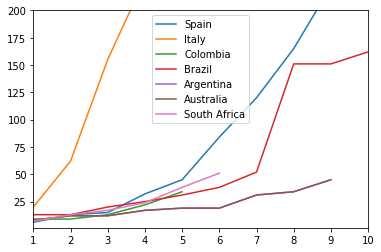

In [144]:
for c in cntr:
    idxs=cv[ cv['Country/Region']== c ].index
    if len(idxs)==1:
        idx=idxs[0]
    else:
        print('Several Province/State')
        
    dl=[l for l in cv.loc[idx,'tolist'] if l>5]
    dllen=len(dl)
    x=range( 1,dllen+1 )
    #plt.semilogy(x,dl,label='{}'.format(c))
    plt.plot(x,dl,label='{}'.format(c))
    
plt.legend(loc='best')
plt.xlim(1,10)
plt.ylim(1,200)

In [111]:
idxs=cv[ cv['Country/Region']=='Spain' ].index

In [112]:
if len(idxs)==1:
    idx=idxs[0]
else:
    print('Several Province/State')

In [117]:
dl=[l for l in cv.loc[idx,'tolist'] if l>5]
dllen=len(dl)
x=range( 1,dllen+1 )

In [118]:
x[-1]

20

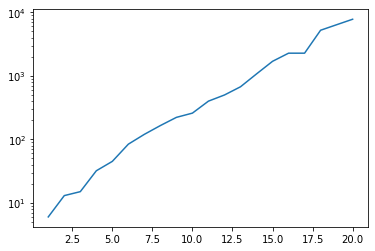

In [119]:
plt.semilogy(x,dl)

In [108]:
dl[53]

114